In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("smartprix_laptop_cleaned_v7.xlsx")

In [3]:
df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,graphics_card_brand,PPI
628,143990,4.30,78,MSI,16,15.6,Windows 11,24,8,AMD,16,DDR5,1024,SSD,NVIDIA,141.211998
177,55990,4.45,54,Lenovo,12,16.0,Windows 11,12,10,Intel,16,DDR5,512,SSD,Others,137.681698
75,71990,4.00,61,Acer,20,14.0,Windows 11,12,14,Intel,16,LPDDR5,1024,SSD,Intel,242.588086
283,54990,4.60,64,MSI,12,15.6,Windows 11,24,8,Intel,16,DDR5,512,SSD,Others,141.211998
150,75990,4.00,66,Lenovo,16,15.6,Windows 11,12,10,Intel,16,DDR5,512,SSD,NVIDIA,141.211998


In [4]:
df.shape

(824, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                824 non-null    int64  
 1   rating               824 non-null    float64
 2   specScore            824 non-null    int64  
 3   brand                824 non-null    object 
 4   threads              824 non-null    int64  
 5   screen_size          824 non-null    float64
 6   os                   824 non-null    object 
 7   warranty             824 non-null    int64  
 8   core_count           824 non-null    int64  
 9   processor_brand      824 non-null    object 
 10  ram_capacity         824 non-null    int64  
 11  ram_type             801 non-null    object 
 12  memory_capacity      824 non-null    int64  
 13  memory_type          824 non-null    object 
 14  graphics_card_brand  824 non-null    object 
 15  PPI                  824 non-null    flo

In [6]:
df.isnull().sum()

price                   0
rating                  0
specScore               0
brand                   0
threads                 0
screen_size             0
os                      0
warranty                0
core_count              0
processor_brand         0
ram_capacity            0
ram_type               23
memory_capacity         0
memory_type             0
graphics_card_brand     0
PPI                     0
dtype: int64

In [7]:
df['ram_type'].fillna('N/A', inplace=True)

In [8]:
df.isnull().sum()

price                  0
rating                 0
specScore              0
brand                  0
threads                0
screen_size            0
os                     0
warranty               0
core_count             0
processor_brand        0
ram_capacity           0
ram_type               0
memory_capacity        0
memory_type            0
graphics_card_brand    0
PPI                    0
dtype: int64

In [9]:
df.to_excel("smartprix_laptop_cleaned_v8.xlsx", index=False)

## Prepare X & y variables

In [10]:
X = df.drop(columns=['price'])
y = df['price']

In [11]:
X.sample(5)

,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,graphics_card_brand,PPI
127,4.40,66,Dell,16,15.6,Windows 11,12,10,Intel,16,DDR5,512,SSD,NVIDIA,141.211998
226,4.10,68,Acer,16,15.6,Windows 11,12,10,Intel,16,DDR5,512,SSD,NVIDIA,141.211998
198,4.35,83,HP,16,16.0,Windows 11,12,8,AMD,32,DDR5,1024,SSD,NVIDIA,183.575598
349,4.25,70,HP,20,16.0,Windows 11,12,14,Intel,16,LPDDR5x,512,SSD,NVIDIA,188.679623
134,4.05,63,Asus,16,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,Intel,141.211998


In [12]:
y.sample(5)

466    51990
510    55990
603    97106
754    68990
154    64990
Name: price, dtype: int64

In [13]:
df.sample(3)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,graphics_card_brand,PPI
536,64119,4.60,68,Lenovo,12,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,Intel,141.211998
153,81999,4.75,64,HP,22,14.0,Windows 11,12,16,Intel,16,DDR5,512,SSD,Intel,157.350512
506,23990,4.70,47,Acer,4,14.0,Windows 11,12,2,AMD,8,DDR4,256,SSD,AMD,111.935204


In [14]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [15]:
num_features

Index(['rating', 'specScore', 'threads', 'screen_size', 'warranty',
       'core_count', 'ram_capacity', 'memory_capacity', 'PPI'],
      dtype='object')

In [16]:
cat_features

Index(['brand', 'os', 'processor_brand', 'ram_type', 'memory_type',
       'graphics_card_brand'],
      dtype='object')

## Encoding & Scaling in a pipeline

- Since ML algorithm can not function with categorical data, we need to encode them into numbers & for that we can decide the type of encoding we want to apply. If its a ordinal data(which has an order like high, meduim low) we can asign integer numbers to them else if its nominal data then we can apply OHE

- Once all data is in numerical form, we can apply Scaling like standardscaling or min-max scaling(normalization) or robust scaling

#### all cat_features except memory type, we will do OHE, In memory type we will asign integer to determine hirarchey

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(sparse_output=False, drop='first')  # Updated parameter
ordinal_transformer = OrdinalEncoder(categories=[['Hard', 'SSD']])  # Higher value for SSD

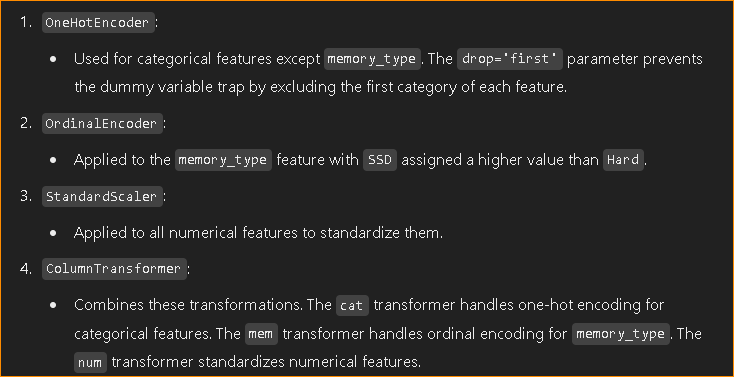

In [19]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('onehot', oh_transformer)
        ]), cat_features),
        ('mem', Pipeline(steps=[
            ('ordinal', ordinal_transformer)
        ]), ['memory_type']),
        ('num', Pipeline(steps=[
            ('scaler', numeric_transformer)
        ]), num_features)
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.21199543,
        -0.48380568, -0.43329014],
       [ 1.        ,  0.        ,  0.        , ...,  0.21199543,
         1.22624636, -0.43329014],
       [ 0.        ,  0.        ,  0.        , ..., -0.96432938,
        -0.48380568, -0.44395924],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.96432938,
        -1.33883171, -0.44395924],
       [ 0.        ,  0.        ,  0.        , ..., -0.96432938,
        -0.48380568, -0.44395924],
       [ 0.        ,  0.        ,  1.        , ..., -0.96432938,
        -0.48380568, -1.90454557]])

In [22]:
X.shape

(824, 38)

## Seperate data into train test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((659, 38), (165, 38))

## Model training

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor, TheilSenRegressor, QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Define the function to calculate metrics
def evaluate_regression_metrics(y_test, y_pred, num_predictors):
    metrics = {}
    metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    metrics['MSE'] = mean_squared_error(y_test, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R2'] = r2_score(y_test, y_pred)
    metrics['Adjusted R2'] = 1 - (1 - metrics['R2']) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    return metrics

# Define models (including new ones)
models = {
    'a': ["SVR", SVR()],
    'b': ["LinearRegression", LinearRegression()],
    'c': ["SGDRegressor", SGDRegressor()],
    'd': ["KNeighborsRegressor", KNeighborsRegressor()],
    'e': ["GaussianProcessRegressor", GaussianProcessRegressor()],
    'f': ["DecisionTreeRegressor", DecisionTreeRegressor()],
    'g': ["GradientBoostingRegressor", GradientBoostingRegressor()],
    'h': ["RandomForestRegressor", RandomForestRegressor()],
    'i': ["IsotonicRegression", IsotonicRegression()],
    'j': ["MLPRegressor", MLPRegressor()],
    'k': ["XGBRegressor", XGBRegressor()],
    'l': ["Ridge", Ridge()],
    'm': ["Lasso", Lasso()],
    'n': ["ElasticNet", ElasticNet()],
    'o': ["HuberRegressor", HuberRegressor()],
    'p': ["TheilSenRegressor", TheilSenRegressor()],
    'q': ["QuantileRegressor", QuantileRegressor()]
}

# Define function to test the model and compute metrics
def test_model(model, X, y):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    num_predictors = X.shape[1]
    metrics = evaluate_regression_metrics(y, y_pred, num_predictors)
    return metrics

# Train models and calculate metrics
model_scores = []
for model_key, (model_name, model) in models.items():
    try:
        print(f"Training model: {model_name}")
        metrics = test_model(model, X_train, y_train)
        metrics['Model'] = model_name
        model_scores.append(metrics)
    except Exception as e:
        print(f"{model_name}: {e}")

# Convert metrics to DataFrame
df_model_scores = pd.DataFrame(model_scores)
df_model_scores = df_model_scores[['Model', 'R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE']]

Training model: SVR
Training model: LinearRegression
Training model: SGDRegressor
Training model: KNeighborsRegressor
Training model: GaussianProcessRegressor
Training model: DecisionTreeRegressor
Training model: GradientBoostingRegressor
Training model: RandomForestRegressor
Training model: IsotonicRegression
IsotonicRegression: Isotonic regression input X should be a 1d array or 2d array with 1 feature
Training model: MLPRegressor


C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Training model: XGBRegressor
Training model: Ridge
Training model: Lasso
Training model: ElasticNet
Training model: HuberRegressor


C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converg

Training model: TheilSenRegressor
Training model: QuantileRegressor


In [27]:
df_model_scores.sort_values(by='R2', ascending=False).reset_index(drop=True)

,Model,R2,Adjusted R2,MAE,MSE,RMSE
0,RandomForestRegressor,0.885275,0.878243,9795.264955,3.732435e+08,19319.511227
1,GradientBoostingRegressor,0.870501,0.862564,10326.131758,4.213066e+08,20525.754867
2,XGBRegressor,0.864721,0.856429,10231.532083,4.401139e+08,20978.891081
3,KNeighborsRegressor,0.841492,0.831777,12899.552656,5.156855e+08,22708.710149
4,Ridge,0.815263,0.803940,15963.130338,6.010181e+08,24515.669585
5,Lasso,0.813218,0.801770,16067.453109,6.076719e+08,24651.001336
6,LinearRegression,0.812787,0.801312,16089.737590,6.090742e+08,24679.428728
7,SGDRegressor,0.805460,0.793537,16201.360960,6.329100e+08,25157.701609
8,TheilSenRegressor,0.801546,0.789382,14954.630291,6.456452e+08,25409.549860
9,ElasticNet,0.797382,0.784964,14962.148419,6.591895e+08,25674.686911


#### Random forest regressor has the best r2 score among all other algorithms so we'll use that !!